# 2D Steady State Heat conduction by Finite Difference Method

Following finite-difference equations are used for various type of nodes.

1. interior node
$$T_{m,n+1} + T_{m,n-1} + T_{m+1,n} + T_{m-1,n} - 4T_{m,n} = 0$$ 
2. Node at an internal corner with convection
$$2(T_{m-1,n} + T_{m, n+1}) + (T_{m+1,n} + T_{m,n-1}) + 2 \frac{h \Delta x}{k}T_{\infty} - 2\left(3 + \frac{h \Delta x}{k}\right)T_{m,n} = 0$$
3. Node at a plane surface with convection
$$(2T_{m-1,n} + T_{m,n+1} + T_{m, n-1}) + 2 \frac{h \Delta x}{k}T_{\infty} - 2\left(\frac{h \Delta x}{k} + 2 \right)T_{m,n} = 0$$
4. Node at an external corner with convection
$$(T_{m,n-1} + T_{m-1, n}) + 2 \frac{h \Delta x}{k}T_{\infty} - 2\left(\frac{h \Delta x}{k} + 1 \right)T_{m,n} = 0$$
5. Node at a plane surface with uniform heat flux
$$(2T_{m-1,n} + T_{m,n+1} + T_{m, n-1}) + 2 \frac{q'' \Delta x}{k}T_{\infty} - 4T_{m,n} = 0$$



Consider a gas turbine blade with air channels inside to maintain the temperature of the material within the failing limit. The blade can be modeled as a rectangular solid in which retangular channels are machined. The blade, which has a thermal conductivity of k=25 W/mK, is 6 mm thick, and each channel has a 2mm x 6 mm rectangular cross section, with a 4-mm spacing between adjoining channels. Under operating conditions for which $h_o =$ 1000 W/m2K, $T_{\infty,o} = $ 1700 K, $h_i$ = 200 W/m2K, and $T_{\infty,i}$ = 400 K, determine the temperature field in the turbine blade and the rate of heat transfer per unit length to the channel.

<img src="images/GTB.png" width="60%">

Consider the following surface with the mesh grid.

<img src="images/2DMesh.png" width="80%">

We see 21 temperature nodes among which 8 unique types are found. Following assumptions are made.

Assumptions
1. Steady-state, 
2. Two-dimenstional conduction
3. Constant property

Node 1: $T_2 + T_7 - \left(2 + \frac{h_o\Delta x}{k}\right)T_1 = -\frac{h_o \Delta x}{k} T_{\infty,o}$

Node 2: $(2T_8 + T_1 + T_3) - 2\left(\frac{h_o \Delta x}{k} + 2\right)T_2= - 2\frac{h_o \Delta x}{k}T_{\infty,o} $

Node 3: $(2T_9 + T_2 + T_4) - 2\left(\frac{h_o \Delta x}{k} + 2\right)T_3= - 2\frac{h_o \Delta x}{k}T_{\infty,o} $

Node 4: $(2T_{10} + T_3 + T_5) - 2\left(\frac{h_o \Delta x}{k} + 2\right)T_4= - 2\frac{h_o \Delta x}{k}T_{\infty,o} $

Node 5: $(2T_{11} + T_4 + T_6) - 2\left(\frac{h_o \Delta x}{k} + 2\right)T_5= - 2\frac{h_o \Delta x}{k}T_{\infty,o} $

Node 6: $T_5 + T_{12} - \left(2 + \frac{h_o\Delta x}{k}\right)T_6 = -\frac{h_o \Delta x}{k} T_{\infty,o}$



Node 7: $T_1 + 2T_8 + T_{13} - 4T_7 = 0$ 

Node 8: $T_2 + T_7 + T_9 + T_{14} - 4T_8 = 0$

Node 9: $T_3 + T_8 + T_{10} + T_{15} - 4T_9 = 0$

Node 10: $T_4 + T_9 + T_{11} + T_{16} - 4T_{10} = 0$

Node 11: $T_5 + T_{10} + T_{12} + T_{17} - 4T_{11} = 0$

Node 12: $T_6 + 2T_{11} + T_{18} - 4T_{12} = 0$ 

Node 13: $T_7 + 2T_{14} + T_{19} - 4T_{13} = 0$ 

Node 14: $T_8 + T_{13} + T_{15} + T_{20} - 4T_{14} = 0$

Node 15: $2(T_{14} + T_{9}) + (T_{16} + T_{21}) - 2\left(3 + \frac{h_i \Delta x}{k}\right)T_{15} = - 2 \frac{h_i \Delta x}{k}T_{\infty,i}$

Node 16: $(2T_{10} + T_{15} + T_{17}) - 2\left(\frac{h_i \Delta x}{k} + 2\right)T_{16}= - 2\frac{h_i \Delta x}{k}T_{\infty,i} $

Node 17: $(2T_{11} + T_{16} + T_{18}) - 2\left(\frac{h_i \Delta x}{k} + 2\right)T_{17}= - 2\frac{h_i \Delta x}{k}T_{\infty,i} $

Node 18: $T_{12} + T_{17} - \left(2 + \frac{h_i \Delta x}{k}\right)T_{18} = - \frac{h_i \Delta x}{k} T_{\infty,i}$

Node 19: $T_{13} + T_{20} - 2T_{19} = 0$

Node 20: $T_{19} + T_{21} + 2T_{14} - 4T_{20} = 0$

Node 21: $T_{20} + T_{15} - \left(2 + \frac{h_i \Delta x}{k}\right)T_{21}= -\frac{h \Delta x}{k}T_{\infty,i}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

noNode = 21
DeltaX = 0.001
k = 25
h_o = 1000
T_inf_o = 1700
h_i = 200
T_inf_i = 400
hDk_i = h_i * DeltaX / k
hDk_o = h_o * DeltaX / k

In [2]:
## Set the matrix
A = np.array([[-(2+hDk_o), 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [1, -2*(2+hDk_o), 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 1, -2*(2+hDk_o), 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 1, -2*(2+hDk_o), 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 1, -2*(2+hDk_o), 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, -(2+hDk_o), 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 0, -4, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 1, 0, 0, 0, 0, 1, -4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 1, 0, 0, 0, 0, 1, -4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 1, 0, 0, 0, 0, 1, -4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, -4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, -4, 0, 0, 0, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -4, 2, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, -4, 1, 0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, -2*(3+hDk_i), 1, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, -2*(2+hDk_i), 1, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, -2*(2+hDk_i), 1, 0, 0, 0], 
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, -(2+hDk_i), 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -2, 1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, -4, 1],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, -(2+hDk_i)]])
C = np.array([[-hDk_o * T_inf_o], [-2*hDk_o * T_inf_o], [-2*hDk_o * T_inf_o], [-2*hDk_o * T_inf_o],
               [-2*hDk_o * T_inf_o], [-hDk_o * T_inf_o], [0], [0], [0], [0], [0], [0], [0], [0],
               [-2*hDk_i * T_inf_i], [-2*hDk_i * T_inf_i], [-2*hDk_i * T_inf_i], [-hDk_i * T_inf_i],
               [0], [0], [-hDk_i * T_inf_i]])

In [3]:
T = np.matmul(np.linalg.inv(A),C)
print(T)

[[1525.95413813]
 [1525.27944565]
 [1523.59609075]
 [1521.93574674]
 [1520.83066847]
 [1520.45069026]
 [1519.66699612]
 [1518.7949547 ]
 [1516.52842892]
 [1514.53554374]
 [1513.30134519]
 [1512.88873965]
 [1515.12393697]
 [1513.70494809]
 [1509.18712651]
 [1506.37665411]
 [1504.9504289 ]
 [1504.50157796]
 [1513.41885557]
 [1511.71377418]
 [1506.02634497]]


In [4]:
X, Y = np.meshgrid(np.linspace(0, DeltaX*5, num  = 6), np.linspace(0,DeltaX*3, num = 4) )
TMesh = np.zeros((4, 6))
k = 0
for i in range(4):
    for j in range(6):
        if k < 21:
            TMesh[i,j] = T[k]  
        k = k + 1
            

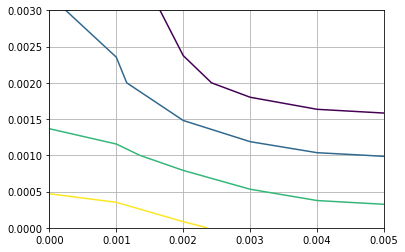

In [5]:
plt.contour(X,Y,TMesh,[1508, 1513, 1518, 1523])
plt.grid('on')
plt.show()